# Dataset 88

# Phase 1. Exploratory analysis

## 1. Basic description of the data together with their characteristics

### 1. Analysis of data structures

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
session = pd.read_csv('data/session.csv', delimiter='\t')
session.head()

,pct_scroll_move_duration,pct_mouse_move,mouse_move_total_rel_distance,page_activity_duration,pct_scrandom,screen_width,ack,pct_mouse_click,pct_input,pct_click,...,user_id,scroll_move_total_rel_distance,pct_click_product_info,session_duration,pct_wild_mouse,screen_height,session_start,pct_rage_click,wild_mouse_duration,pct_doubleclick
0,9.59904,7.68939,5.37487,8.36462,31.30541,800,0.0,9.13505,0.04125,9.68902,...,2181,11.36007,46.97437,66.07483,56.99436,800,2021-07-25 06:48:47,50.79621,13.68951,12.36846
1,7.53387,8.62357,9.09357,10.26733,53.09397,lower,1.0,8.63617,0.00756,12.24018,...,447,7.83061,47.09336,133.26423,19.65326,higher,2019-01-11 02:58:46,49.31536,11.98616,7.30068
2,8.27570,9.14421,7.75349,11.57870,37.21614,lower,1.0,8.69043,0.01219,10.83064,...,1958,8.30039,25.37883,97.32817,18.45055,768,2020-11-29 07:57:48,36.50380,12.46916,7.71466
3,9.38995,9.19876,7.21016,6.81575,56.69968,higher,0.0,9.37578,0.00616,11.86437,...,1195,9.38410,47.34555,120.87960,35.62900,600,2019-08-25 20:50:57,55.56358,11.78585,12.05817
4,8.50961,9.03280,8.92165,7.77596,58.27990,1366,0.0,9.91178,0.00026,11.65294,...,1241,7.14706,35.27738,128.79379,61.64424,800,2019-02-14 23:18:06,63.49090,8.42849,12.72820


In [3]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move_duration        11089 non-null  float64
 1   pct_mouse_move                  11089 non-null  float64
 2   mouse_move_total_rel_distance   11089 non-null  float64
 3   page_activity_duration          11089 non-null  float64
 4   pct_scrandom                    11089 non-null  float64
 5   screen_width                    11100 non-null  object 
 6   ack                             11100 non-null  float64
 7   pct_mouse_click                 11089 non-null  float64
 8   pct_input                       11089 non-null  float64
 9   pct_click                       11088 non-null  float64
 10  session_id                      11100 non-null  int64  
 11  product_ean                     11100 non-null  int64  
 12  browser_name                    

In [4]:
print('session.shape:', session.shape)

session.shape: (11100, 25)


In [5]:
product = pd.read_csv('data/product.csv', delimiter='\t')
product.head()

,code,store_name,location,product_ean
0,CN,Tianfu,Asia/Shanghai,3219884099674
1,MA,Azrou,Africa/Casablanca,4361569838852
2,PK,Jhol,Asia/Karachi,943609752911
3,US,New City,America/Chicago,1160422163567
4,TN,Msaken,Africa/Tunis,8865331741532


In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14968 entries, 0 to 14967
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14959 non-null  object
 1   store_name   14968 non-null  object
 2   location     14968 non-null  object
 3   product_ean  14968 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 467.9+ KB


In [7]:
print('product.shape:', product.shape)

product.shape: (14968, 4)


In [8]:
user = pd.read_csv('data/user.csv', delimiter='\t')
user.head()

,race,user_id,registration,sex,name,job,username,birthdate,mail,residence,address
0,unspecified,2043,2021/06/09,NaN,Guilherme Vieira,NaN,benjamincardoso,NaN,bernardoda-costa@gmail.com,Colônia Cunha\nSão Bernardo\n82378944 Ribeiro ...,"Estação Alana Azevedo, 1\nVila Nova Paraíso\n4..."
1,NaN,765,28 Jun 2018,NaN,Bradley Allen,Mental health nurse,richard34,NaN,marcusgonzalez@hotmail.com,"508 Brian Passage Suite 633\nDianafurt, RI 48847","623 Baker Shores\nNorth Andreatown, NM 02736"
2,NaN,1813,13 Jul 2018,NaN,Kamila Holubová,Event organiser,krizovanikol,NaN,marcel49@volny.cz,Boční I 39\n575 30 Veltrusy,Kováříkova 363\n366 16 Libčice nad Vltavou
3,black,2243,2022-06-13,NaN,Marissa Poerio-Lattuada,NaN,morriconesylvia,1911-10-05,vittoria42@poste.it,NaN,"Via Cipriano, 1 Appartamento 8\n98137, Santo S..."
4,NaN,1328,21 Jan 2019,NaN,Lubomír Doležal,Marketing executive,cermakovabarbora,1962-05-17,ivanakrizova@post.cz,Bermanova 27\n762 59 Štětí,NaN


In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   race          760 non-null    object
 1   user_id       2532 non-null   int64 
 2   registration  2532 non-null   object
 3   sex           1266 non-null   object
 4   name          2532 non-null   object
 5   job           1013 non-null   object
 6   username      2532 non-null   object
 7   birthdate     1393 non-null   object
 8   mail          2532 non-null   object
 9   residence     886 non-null    object
 10  address       2152 non-null   object
dtypes: int64(1), object(10)
memory usage: 217.7+ KB


In [10]:
print('user.shape:', user.shape)

user.shape: (2532, 11)


### 2. Analysis of individual attributes

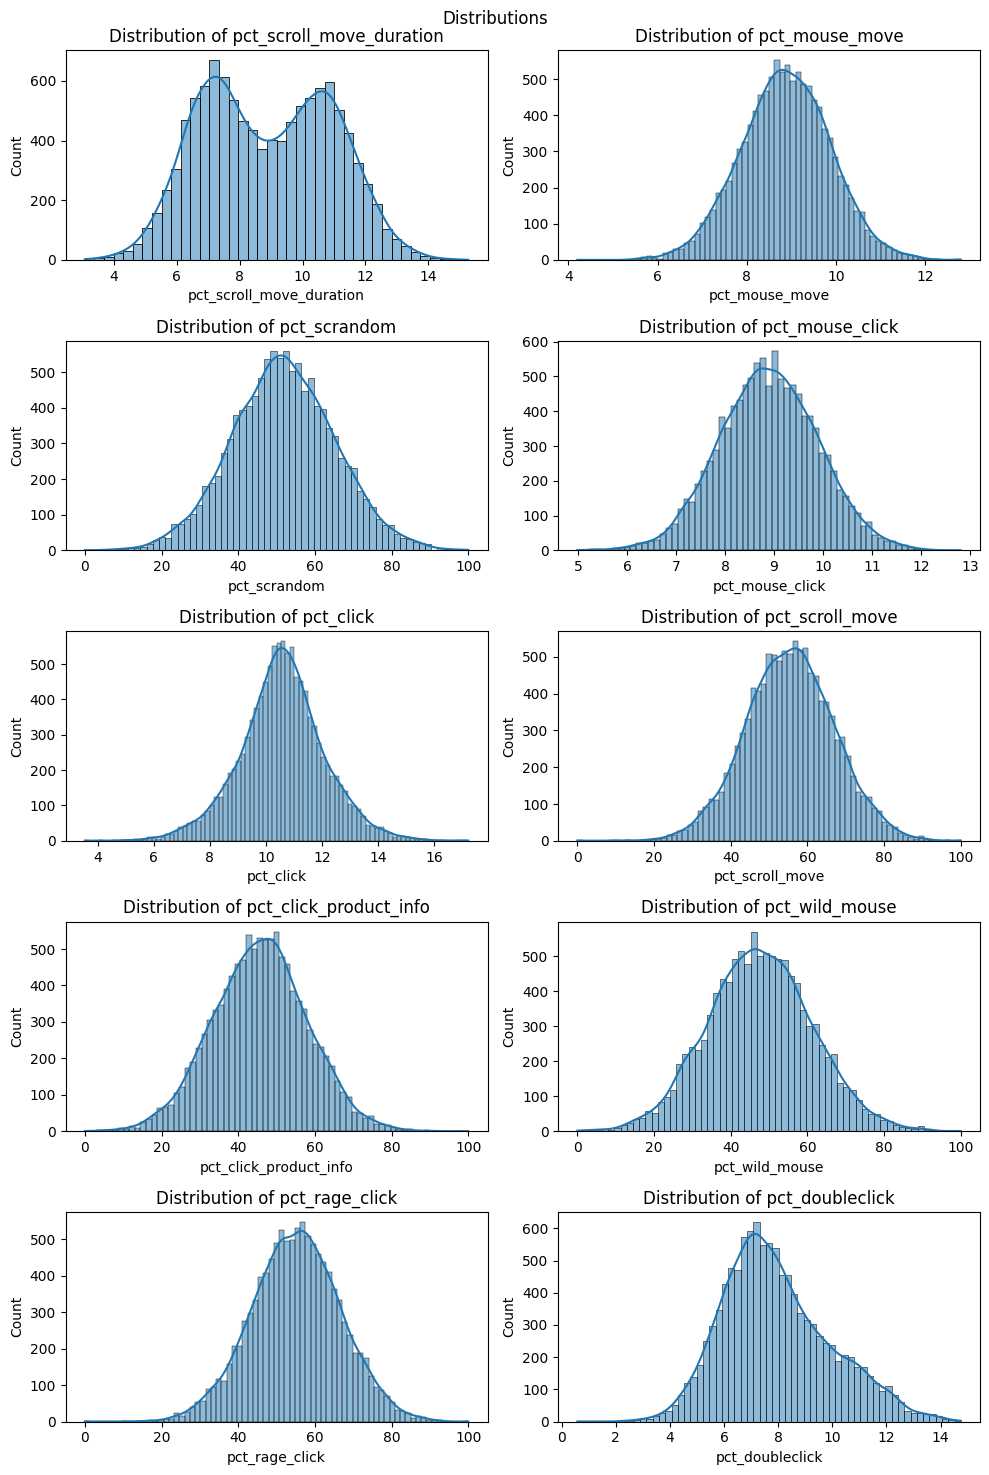

In [11]:
selected_attributes = ['pct_scroll_move_duration', 'pct_mouse_move', 'pct_scrandom',
                       'pct_mouse_click', 'pct_click',
                       'pct_scroll_move', 'pct_click_product_info', 'pct_wild_mouse',
                       'pct_rage_click', 'pct_doubleclick']

# Create subplots
fig, axes = plt.subplots(nrows=len(selected_attributes) // 2, ncols=2, figsize=(10, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through selected attributes
for i, attribute in enumerate(selected_attributes):
    if i < len(axes):  # Add this check to ensure you don't exceed the number of subplots
        sns.histplot(session[attribute], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {attribute}')

# Adjust layout
plt.suptitle('Distributions')
plt.tight_layout()

# Show the plot
plt.show()

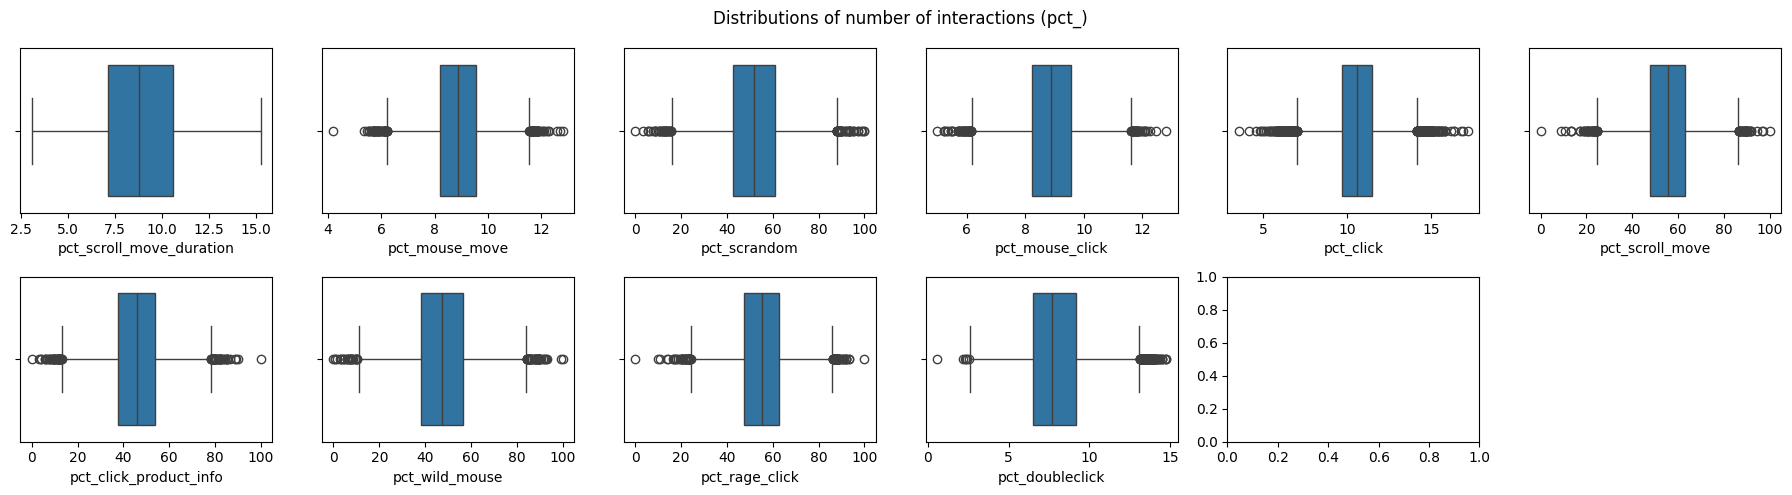

In [12]:
fig, ax = plt.subplots(2, 6, figsize=(18, 5))
ax = ax.flatten()

for i, c in enumerate(selected_attributes):
    sns.boxplot(data=session, x=c, ax=ax[i])

fig.suptitle('Distributions of number of interactions (pct_)')
fig.delaxes(ax[11])
fig.tight_layout()
plt.show()

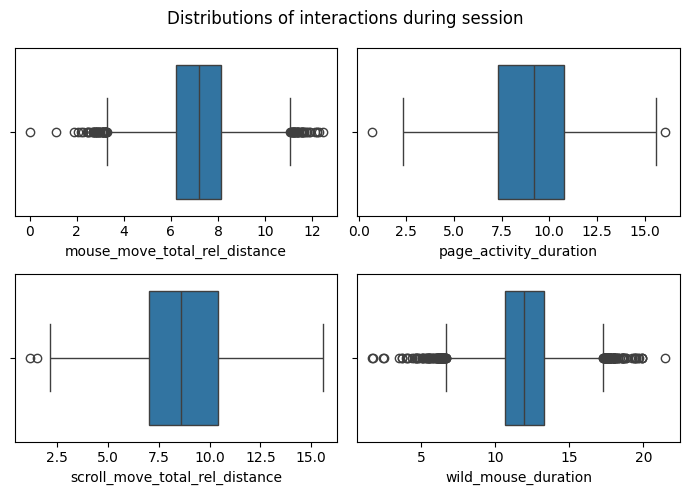

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5))
ax = ax.flatten()

for i, c in enumerate(['mouse_move_total_rel_distance', 'page_activity_duration',
                       'scroll_move_total_rel_distance', 'wild_mouse_duration']):
    sns.boxplot(data=session, x=c, ax=ax[i])

fig.suptitle('Distributions of interactions during session')
fig.tight_layout()
plt.show()

In [14]:
# Get basic descriptive statistics
selected_data = session[selected_attributes]
statistic = selected_data.describe()
statistic

,pct_scroll_move_duration,pct_mouse_move,pct_scrandom,pct_mouse_click,pct_click,pct_scroll_move,pct_click_product_info,pct_wild_mouse,pct_rage_click,pct_doubleclick
count,11089.000000,11089.000000,11089.000000,11089.000000,11088.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000
mean,8.863328,8.869746,51.834695,8.892028,10.576188,55.484989,45.745217,47.581786,55.114312,7.934614
std,2.070682,1.000283,13.445601,1.005343,1.503111,11.504702,12.210080,13.578402,11.581450,1.991348
min,3.072970,4.200530,0.000000,4.982420,3.544250,0.000000,0.000000,0.000000,0.000000,0.577710
25%,7.149960,8.210180,42.763390,8.210940,9.681677,47.743630,37.551950,38.384280,47.375600,6.538070
50%,8.799820,8.872130,51.712620,8.888520,10.579185,55.534770,45.863560,47.378430,55.231740,7.658610
75%,10.590910,9.546220,60.811730,9.573020,11.467913,63.148590,53.769410,56.653100,62.858730,9.159700
max,15.273650,12.794460,100.000000,12.814200,17.211580,100.000000,100.000000,100.000000,100.000000,14.746930


### 3. Paired data analysis

In [15]:
selected_data = session[selected_attributes]

# Calculate correlations
correlations = selected_data.corr()

# Display correlation matrix
correlations

,pct_scroll_move_duration,pct_mouse_move,pct_scrandom,pct_mouse_click,pct_click,pct_scroll_move,pct_click_product_info,pct_wild_mouse,pct_rage_click,pct_doubleclick
pct_scroll_move_duration,1.000000,0.020422,-0.005323,-0.011882,-0.161384,0.003352,-0.003045,0.005432,0.002284,0.337631
pct_mouse_move,0.020422,1.000000,-0.005942,0.005868,0.001649,-0.012905,0.000119,0.001410,-0.018629,0.004313
pct_scrandom,-0.005323,-0.005942,1.000000,-0.002728,-0.006444,0.008549,0.007164,0.001370,0.000734,-0.013985
pct_mouse_click,-0.011882,0.005868,-0.002728,1.000000,0.008440,0.011533,-0.001500,-0.012699,0.010973,0.000274
pct_click,-0.161384,0.001649,-0.006444,0.008440,1.000000,-0.000030,0.006995,0.007304,0.007486,0.202018
pct_scroll_move,0.003352,-0.012905,0.008549,0.011533,-0.000030,1.000000,0.006732,0.004598,-0.001369,-0.007142
pct_click_product_info,-0.003045,0.000119,0.007164,-0.001500,0.006995,0.006732,1.000000,-0.008260,0.001814,-0.001463
pct_wild_mouse,0.005432,0.001410,0.001370,-0.012699,0.007304,0.004598,-0.008260,1.000000,0.004192,0.006083
pct_rage_click,0.002284,-0.018629,0.000734,0.010973,0.007486,-0.001369,0.001814,0.004192,1.000000,0.003848
pct_doubleclick,0.337631,0.004313,-0.013985,0.000274,0.202018,-0.007142,-0.001463,0.006083,0.003848,1.000000


In [16]:
session_num = session.drop(['browser_name', 'session_start'], axis=1)
session_num.columns

Index(['pct_scroll_move_duration', 'pct_mouse_move',
       'mouse_move_total_rel_distance', 'page_activity_duration',
       'pct_scrandom', 'screen_width', 'ack', 'pct_mouse_click', 'pct_input',
       'pct_click', 'session_id', 'product_ean', 'total_load_time',
       'pct_scroll_move', 'user_id', 'scroll_move_total_rel_distance',
       'pct_click_product_info', 'session_duration', 'pct_wild_mouse',
       'screen_height', 'pct_rage_click', 'wild_mouse_duration',
       'pct_doubleclick'],
      dtype='object')

There are no much correlated variables in this dataset. Columns which are correlated with column `ack` are: `wild_mouse_duration`, `pct_doubleclick`, `scroll_move_total_rel_distance`, `page_activity_duration`.

In [17]:
selected_attributes = [
    'pct_scroll_move_duration', 'pct_mouse_move', 'mouse_move_total_rel_distance',
    'page_activity_duration', 'pct_scrandom', 'pct_mouse_click',
    'pct_click', 'total_load_time', 'pct_scroll_move', 'scroll_move_total_rel_distance',
    'pct_click_product_info', 'session_duration', 'wild_mouse_duration',
    'pct_doubleclick', 'ack'
]

selected_data = session[selected_attributes]

correlations = selected_data.corr()['ack'].sort_values(ascending=False)

print(correlations)

ack                               1.000000
page_activity_duration            0.710296
total_load_time                   0.012219
pct_scroll_move                   0.009639
pct_mouse_move                    0.005855
mouse_move_total_rel_distance     0.004392
pct_scroll_move_duration          0.004375
pct_scrandom                      0.001609
pct_click                        -0.001817
pct_mouse_click                  -0.002547
pct_click_product_info           -0.005612
session_duration                 -0.011340
wild_mouse_duration              -0.357072
pct_doubleclick                  -0.395048
scroll_move_total_rel_distance   -0.710558
Name: ack, dtype: float64


## 2. Identifying problems in data with an initial solution

### 1. Data Cleaning: `session`

In [18]:
print(f'Ratio of missing values in columns:\n')
session.isnull().sum() / len(session)

Ratio of missing values in columns:



pct_scroll_move_duration          0.000991
pct_mouse_move                    0.000991
mouse_move_total_rel_distance     0.000991
page_activity_duration            0.000991
pct_scrandom                      0.000991
screen_width                      0.000000
ack                               0.000000
pct_mouse_click                   0.000991
pct_input                         0.000991
pct_click                         0.001081
session_id                        0.000000
product_ean                       0.000000
browser_name                      0.000000
total_load_time                   0.000000
pct_scroll_move                   0.000991
user_id                           0.000000
scroll_move_total_rel_distance    0.000991
pct_click_product_info            0.000991
session_duration                  0.000000
pct_wild_mouse                    0.000991
screen_height                     0.000000
session_start                     0.000000
pct_rage_click                    0.000991
wild_mouse_

In [19]:
session.shape

(11100, 25)

In [20]:
session.describe()

,pct_scroll_move_duration,pct_mouse_move,mouse_move_total_rel_distance,page_activity_duration,pct_scrandom,ack,pct_mouse_click,pct_input,pct_click,session_id,...,total_load_time,pct_scroll_move,user_id,scroll_move_total_rel_distance,pct_click_product_info,session_duration,pct_wild_mouse,pct_rage_click,wild_mouse_duration,pct_doubleclick
count,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000,11100.000000,11089.000000,11089.000000,11088.000000,1.110000e+04,...,11100.000000,11089.000000,11100.000000,11089.000000,11089.000000,11100.000000,11089.000000,11089.000000,11088.000000,11089.000000
mean,8.863328,8.869746,7.182824,9.057408,51.834695,0.544685,8.892028,0.086754,10.576188,7.432213e+05,...,3.956264,55.484989,1242.806847,8.709711,45.745217,150.374473,47.581786,55.114312,11.984365,7.934614
std,2.070682,1.000283,1.444208,2.221683,13.445601,0.498022,1.005343,1.107476,1.503111,4.303225e+05,...,2.828242,11.504702,719.104294,2.200628,12.210080,59.128350,13.578402,11.581450,2.063099,1.991348
min,3.072970,4.200530,0.000000,0.696780,0.000000,0.000000,4.982420,0.000000,3.544250,1.016000e+03,...,0.016040,0.000000,0.000000,1.134530,0.000000,-109.714210,0.000000,0.000000,1.668660,0.577710
25%,7.149960,8.210180,6.199090,7.330220,42.763390,0.000000,8.210940,0.002000,9.681677,3.669202e+05,...,1.869945,47.743630,619.000000,7.000820,37.551950,110.561643,38.384280,47.375600,10.642758,6.538070
50%,8.799820,8.872130,7.194930,9.201730,51.712620,1.000000,8.888520,0.007110,10.579185,7.423380e+05,...,3.303360,55.534770,1245.000000,8.613320,45.863560,150.239795,47.378430,55.231740,11.927080,7.658610
75%,10.590910,9.546220,8.137260,10.771540,60.811730,1.000000,9.573020,0.027830,11.467913,1.116794e+06,...,5.340663,63.148590,1861.000000,10.431300,53.769410,190.747430,56.653100,62.858730,13.297320,9.159700
max,15.273650,12.794460,12.452580,16.089860,100.000000,1.000000,12.814200,100.000000,17.211580,1.499929e+06,...,23.733920,100.000000,2499.000000,15.576910,100.000000,387.116680,100.000000,100.000000,21.484190,14.746930


Replace values `lower` and `higher` in `screen_width` column by 0 and 1 respectively, so we can transform full column to int datatype:

In [21]:
map_screen = {'lower': 0, 'higher': 1}

session['screen_width'] = session['screen_width'].replace(map_screen)
session['screen_width'] = session['screen_width'].astype(int)
session['screen_width'].unique()

array([ 800,    0,    1, 1366, 1280, 1024, 1920])

Make the same procedure for the `screen_height` column:

In [22]:
session['screen_height'] = session['screen_height'].replace(map_screen)
session['screen_height'] = session['screen_height'].astype(int)
session['screen_height'].unique()

array([ 800,    1,  768,  600, 1024, 1080,    0])

Transform column `session_start` to datetime object:

In [23]:
session['session_start'] = pd.to_datetime(session['session_start'])

Identify and drop `outliers`:

In [24]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [25]:
numeric_attributes = session.select_dtypes(include=['float64', 'int64']).columns.tolist()

for attribute in numeric_attributes:
    outliers = identify_outliers(session['total_load_time'])

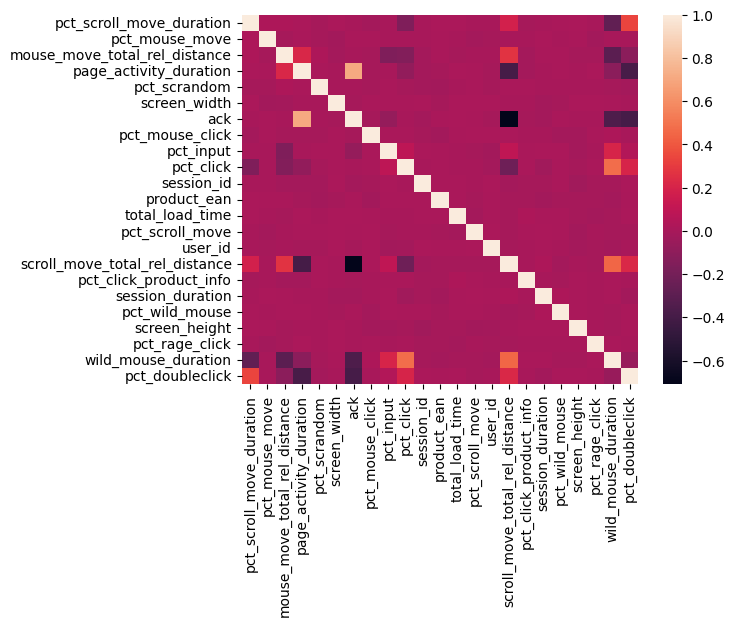

In [26]:
session_num = session.drop(['browser_name', 'session_start'], axis=1)
corr = session_num.corr()
sns.heatmap(corr)
plt.show()

### 2. Data Cleaning: `product`

In [27]:
print(f'Ratio of missing values in columns:\n')
product.isnull().sum() / len(product)

Ratio of missing values in columns:



code           0.000601
store_name     0.000000
location       0.000000
product_ean    0.000000
dtype: float64

In [28]:
product = product.dropna()

Split column `location` by `region` and `city` columns, then drop the `location` column:

In [29]:
region_city = product['location'].str.split('/', n=1, expand=True)
product.loc[:, 'region'] = region_city[0]
product.loc[:, 'city'] = region_city[1]
product = product.drop('location', axis=1)

Replace values in the new columns that have uncorrect results:

In [30]:
map_city = {'Argentina/Cordoba': 'Cordoba', 'Argentina/Tucuman': 'Tucuman',
            'Indiana/Indianapolis': 'Indianapolis', 'Argentina/Ushuaia': 'Ushuaia',
            'Argentina/Buenos Aires': 'Buenos Aires'}
product['city'] = product['city'].replace(map_city)
product['city'] = product['city'].str.replace('_', ' ')

## 3. Formulation and statistical verification of data hypotheses

**$H_0$: Mean `scroll_move_total_rel_distance` during session have lower value when buying.**

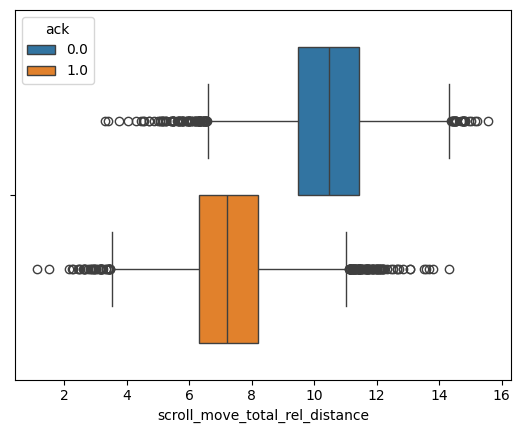

In [31]:
sns.boxplot(data=session, x='scroll_move_total_rel_distance', hue='ack')
plt.show()

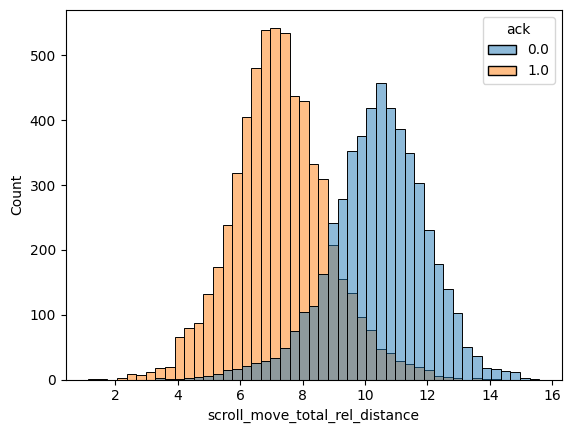

In [32]:
sns.histplot(data=session, x='scroll_move_total_rel_distance', hue='ack')
plt.show()

In [33]:
session_ack0 = session[session['ack'] == 0]['scroll_move_total_rel_distance']
session_ack1 = session[session['ack'] == 1]['scroll_move_total_rel_distance']

In [34]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(session_ack0, session_ack1)
print(f'Statistics={stat:}, p={p}')

if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Statistics=nan, p=nan
Probably different distributions


**We can accept $H_0$ hypothesis. The distributions are unequal and have different means.**

**$H_0$: Mean `page_activity_duration` during session have lower value when not buying.**

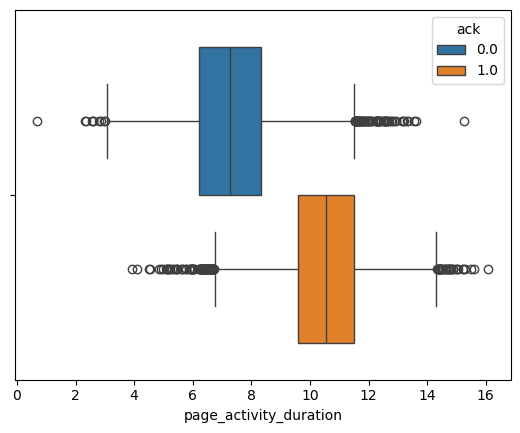

In [35]:
sns.boxplot(data=session, x='page_activity_duration', hue='ack')
plt.show()

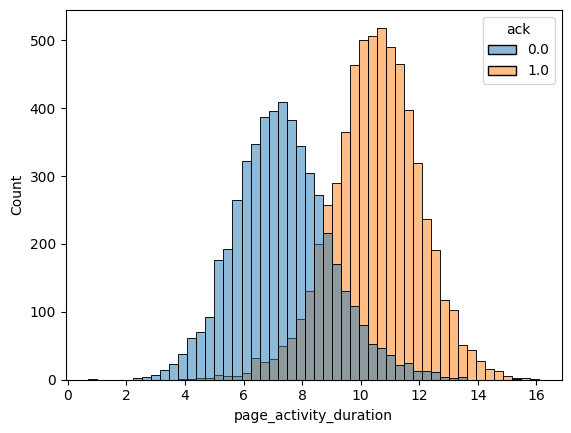

In [36]:
sns.histplot(data=session, x='page_activity_duration', hue='ack')
plt.show()

In [37]:
session_ack0 = session[session['ack'] == 0]['page_activity_duration']
session_ack1 = session[session['ack'] == 1]['page_activity_duration']

In [38]:
stat, p = ttest_ind(session_ack0, session_ack1)
print(f'Statistics={stat:}, p={p}')

if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Statistics=nan, p=nan
Probably different distributions


**We can accept $H_0$ hypothesis. The distributions are unequal and have different means.**

**$H_0$: `page_activity_duration` has a Gaussian distribution.**

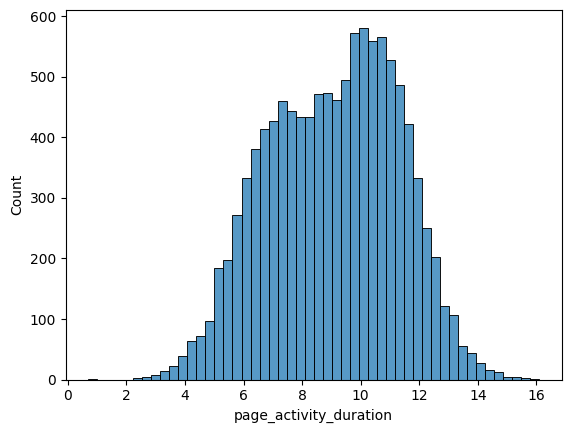

In [39]:
sns.histplot(data=session, x='page_activity_duration')
plt.show()

In [40]:
from scipy.stats import normaltest
stat, p = normaltest(session['page_activity_duration'])
print(f'Statistics={stat:}, p={p}')

if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Statistics=nan, p=nan
Probably not Gaussian


**We must discard $H_0$ hypothesis. The distribution of `page_activity_duration` is not Gaussian.**












# Phase 2. Data preprocessing

## 1. Integration and data cleaning

### 1. Data Cleaning: `user`

In [41]:
print(f'Ratio of missing values in columns:\n')
user.isnull().sum() / len(user)

Ratio of missing values in columns:



race            0.699842
user_id         0.000000
registration    0.000000
sex             0.500000
name            0.000000
job             0.599921
username        0.000000
birthdate       0.449842
mail            0.000000
residence       0.650079
address         0.150079
dtype: float64

`race` column has 69% `NaN`s plus ~10% of unspecified values, which gives 79% missing values in column. This column can be dropped.

In [42]:
user = user.drop('race', axis=1)

In [43]:
user['sex'].value_counts(dropna=False)

sex
NaN    1266
M       646
F       620
Name: count, dtype: int64

In [44]:
user.loc[user['sex'].isna(), 'sex'] = 'Unknown'
user['sex'].value_counts(dropna=False)

sex
Unknown    1266
M           646
F           620
Name: count, dtype: int64

All unique jobs that present in `user` dataset:

In [45]:
user.sort_values(by='job')['job'].unique()

array(['Academic librarian', 'Accommodation manager',
       'Accountant, chartered', 'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrador público', 'Administrator',
       'Administrator, arts', 'Administrator, education',
       'Administrator, local government', 'Adult guidance worker',
       'Advertising art director', 'Advertising copywriter',
       'Aeronautical engineer', 'Agente de combate à endemias',
       'Agente de viagens', 'Agente penitenciário',
       'Agricultural consultant', 'Agricultural engineer', 'Aid worker',
       'Air broker', 'Air cabin crew', 'Airline pilot', 'Alergologista',
       'Altenpfleger', 'Amenity horticulturist',
       'Amolador de ferramentas', 'Angiologista', 'Animal nutritionist',
       'Apontador de mão-de-obra', 'Arboriculturist', 'Archaeologist',
       'Architect', 'Architectural technologist',
       'Armed forces operational officer',
       

Reduce number of unique jobs by making larger groups of jobs:

In [46]:
jobs_dict = {'Academic librarian': 'Education', 'Accommodation manager': 'Manager', 'Accountant, chartered': 'Finance', 'Accountant, chartered certified': 'Finance',
'Accountant, chartered public finance': 'Finance', 'Accounting technician': 'Finance', 'Acupuncturist': 'Medicine', 'Administrador público': 'Manager',
'Administrator, arts': 'Manager', 'Administrator, education': 'Manager', 'Administrator, local government': 'Manager', 'Adult guidance worker': 'Adviser',
'Advertising art director': 'Finance', 'Advertising copywriter': 'Finance','Aeronautical engineer': 'Engineer', 'Agente de combate à endemias': 'Worker',
'Agente de viagens': 'Adviser', 'Agente penitenciário': 'Force', 'Agricultural consultant': 'Environment', 'Agricultural engineer': 'Environment', 'Aid worker': 'Medicine',
'Air broker': 'Aviation', 'Air cabin crew': 'Aviation', 'Airline pilot': 'Aviation', 'Alergologista': 'Medicine', 'Altenpfleger': 'Medicine', 'Amenity horticulturist': 'Environment',
'Amolador de ferramentas': 'Worker', 'Angiologista': 'Medicine', 'Animal nutritionist': 'Medicine', 'Apontador de mão-de-obra': 'Worker', 'Arboriculturist': 'Environment',
'Archaeologist': 'Environment', 'Architect': 'Engineer', 'Architectural technologist': 'Engineer', 'Armed forces operational officer': 'Force', 'Armed forces technical officer': 'Force',
'Armed forces training and education officer': 'Force', 'Arranjador musical': 'Arts', 'Artesão': 'Worker', 'Artist': 'Arts', 'Artista plástico': 'Arts', 'Arts administrator': 'Manager',
'Arts development officer': 'Arts', 'Arzt': 'Arts', 'Asphaltbauer': 'Worker', 'Assistente administrativo': 'Manager', 'Assistente de câmera': 'Arts', 'Associate Professor': 'Education',
'Astronauta': 'Aviation', 'Astronomer': 'Education', 'Atendente': 'Medicine', 'Atleta de canoagem': 'Sports', 'Atleta de tiro com arco': 'Sports', 'Audiological scientist': 'Education',
'Augenoptiker': 'Education', 'Ausbaufacharbeiter': 'Worker', 'Automotive engineer': 'Engineer', 'Aviador': 'Aviation', 'Babá': np.nan, 'Bankkaufmann': 'Finance', 'Barista': 'Food',
'Barrister': 'Food', 'Bartender': 'Food', 'Beamter': 'Worker', 'Binnenschiffer': 'Engineer', 'Biomedical scientist': 'Education', 'Biotecnólogo': 'Engineer', 'Brewing technologist': 'Food',
'Brigadeiro': 'Worker', 'Broadcast engineer': 'Engineer', 'Broadcast presenter': 'Journalist', 'Building services engineer': 'Engineer', 'Building surveyor': 'Engineer', 'Buyer, industrial': 'Finance',
'Bäcker': 'Food', 'Cadista': 'Worker', 'Caldeireiro': 'Worker', 'Call centre manager': 'Manager', 'Careers adviser': 'Adviser', 'Careers information officer': 'Adviser', 'Carpinteiro': 'Worker',
'Cenógrafo': 'Finance', 'Ceramics designer': 'Arts', 'Chartered certified accountant': 'Finance', 'Chartered legal executive (England and Wales)': 'Law',
'Chartered loss adjuster': 'Finance', 'Chemical engineer': 'Engineer', 'Chemikant': 'Engineer', 'Chief Executive Officer': 'CEO', 'Chief Financial Officer': 'CEO',
'Chief Marketing Officer': 'CEO', 'Chief Operating Officer': 'CEO', 'Child psychotherapist': 'Medicine', 'Chiropodist': 'Medicine', 'Chiropractor': 'Medicine',
'Chirurgiemechaniker': 'Medicine', 'Cientista social': 'Education', 'Cineasta': 'Education', 'Cinegrafista': 'Arts', 'Civil Service administrator': 'Manager',
'Civil Service fast streamer': 'Adviser', 'Civil engineer, consulting': 'Engineer', 'Civil engineer, contracting': 'Engineer', 'Claims inspector/assessor': 'Finance',
'Clinical biochemist': 'Medicine', 'Clinical cytogeneticist': 'Medicine', 'Clinical embryologist': 'Medicine', 'Clinical research associate': 'Education',
'Cobrador de pedágio': 'Finance', 'Coloproctologista': 'Medicine', 'Colour technologist': 'Engineer', 'Comandante': 'Force', 'Commercial horticulturist': 'Environment',
'Commissioning editor': 'Engineer', 'Community arts worker': 'Arts', 'Community development worker': 'Adviser', 'Community education officer': 'Manager', 'Community pharmacist': 'Medicine',
'Comptroller': 'Finance', 'Computer games developer': 'Engineer', 'Conference centre manager': 'Manager', 'Conservation officer, historic buildings': 'Arts',
'Conservator, museum/gallery': 'Arts', 'Consulting civil engineer': 'Engineer', 'Contracting civil engineer': 'Engineer', 'Control and instrumentation engineer': 'Engineer',
'Controlador de vôo': 'Aviation', 'Copy': 'Finance', 'Copywriter, advertising': 'Finance', 'Corporate investment banker': 'Finance', 'Corregedor de justiça': 'Law',
'Corretor de imóveis': 'Finance', 'Corretor de seguros': 'Finance', 'Counselling psychologist': 'Medicine', 'Counsellor': 'Adviser', 'Coveiro/Sepultador': 'Worker', 'Cozinheira': 'Food',
'Cumim': 'Engineer', 'Curator': 'Adviser', 'Dance movement psychotherapist': 'Arts', 'Database administrator': 'Engineer', 'Dealer': 'Finance', 'Defensor Público': 'Law',
'Designer': 'Arts', 'Designer de moda': 'Arts', 'Designer, exhibition/display': 'Arts', 'Designer, furniture': 'Arts', 'Designer, graphic': 'Arts',
'Designer, industrial/product': 'Arts', 'Designer, jewellery': 'Arts', 'Designer, multimedia': 'Arts', 'Designer, television/film set': 'Arts',
'Development worker, international aid': 'Adviser', 'Dietitian': 'Medicine', 'Dispensing optician': 'Medicine', 'Doctor, general practice': 'Medicine', 'Doctor, hospital': 'Medicine',
'Drilling engineer': 'Engineer', 'Drogist': 'Medicine', 'Early years teacher': 'Education', 'Ecologist': 'Environment', 'Economista': 'Finance', 'Ecólogo': 'Environment',
'Editor, film/video': 'Arts', 'Editor, magazine features': 'Arts', 'Education officer, community': 'Manager', 'Education officer, museum': 'Manager',
'Elektroniker': 'Engineer', 'Embalsamador': 'Goverment', 'Emergency planning/management officer': 'Manager', 'Encanador': 'Worker', 'Energy engineer': 'Engineer',
'Energy manager': 'Manager', 'Engenheiro cartográfico': 'Engineer', 'Engenheiro de controle e automação': 'Engineer', 'Engenheiro de processos': 'Engineer',
'Engenheiro de produto ou produção': 'Engineer', 'Engenheiro naval': 'Engineer', 'Engineer, agricultural': 'Engineer', 'Engineer, automotive': 'Engineer',
'Engineer, broadcasting (operations)': 'Engineer', 'Engineer, civil (consulting)': 'Engineer', 'Engineer, civil (contracting)': 'Engineer', 'Engineer, electronics': 'Engineer',
'Engineer, energy': 'Engineer', 'Engineer, maintenance': 'Engineer', 'Engineer, maintenance (IT)': 'Engineer', 'Engineer, manufacturing': 'Engineer',
'Engineer, manufacturing systems': 'Engineer', 'Engineer, materials': 'Engineer', 'Engineer, production': 'Engineer', 'Engineer, structural': 'Engineer',
'Engineer, technical sales': 'Engineer', 'Engineering geologist': 'Engineer', 'Environmental consultant': 'Environment', 'Environmental education officer': 'Environment',
'Equality and diversity officer': 'Manager', 'Equities trader': 'Finance', 'Ergonomist': 'Medicine', 'Erzieher': 'Adviser', 'Escriturário': 'Law',
'Especialista em agronegócios': 'Environment', 'Estate agent': 'Finance', 'Event organiser': 'Arts', 'Exhibition designer': 'Arts', 'Exhibitions officer, museum/gallery': 'Arts',
'Fachinformatiker': 'Engineer', 'Facilities manager': 'Manager', 'Farm manager': 'Manager', 'Fashion designer': 'Arts', 'Fast food restaurant manager': 'Manager',
'Faturista': 'Finance', 'Feirante': 'Food', 'Field seismologist': 'Education', 'Field trials officer': 'Education', 'Figurante': 'Arts', 'Film/video editor': 'Arts',
'Financial manager': 'Finance', 'Financial risk analyst': 'Finance', 'Financial trader': 'Finance', 'Firefighter': 'Worker', 'Fleischer': 'Food', 'Florist': 'Environment',
'Forensic scientist': 'Education', 'Forneiro': 'Food', 'Forstwirt': 'Environment', 'Frentista': 'Worker', 'Friseur': 'Worker', 'Funileiro': 'Worker', 'Furniture designer': 'Arts',
'Further education lecturer': 'Education', 'Futures trader': 'Finance', 'Físico nuclear': 'Education', 'Gandula': 'Worker', 'Garment/textile technologist': 'Engineer',
'General practice doctor': 'Medicine', 'Geneticist, molecular': 'Education', 'Geographical information systems officer': 'Manager', 'Geophysical data processor': 'Engineer',
'Geradorista': 'Worker', 'Gerente de banco': 'Manager', 'Gerente de inovações ou novos negócios': 'Manager', 'Gerente de riscos em seguros': 'Manager', 'Gestor público': 'Manager',
'Ginecologista': 'Medicine', 'Glass blower/designer': 'Arts', 'Government social research officer': 'Education', 'Grafologista': 'Arts', 'Haematologist': 'Medicine',
'Headhunter': 'Manager', 'Health physicist': 'Medicine', 'Heritage manager': 'Manager', 'Higher education careers adviser': 'Adviser', 'Higher education lecturer': 'Education',
'Historic buildings inspector/conservation officer': 'Arts', 'Holiday representative': 'Arts', 'Homeopath': 'Medicine', 'Horticultural therapist': 'Environment',
'Horticulturist, commercial': 'Environment', 'Hospital pharmacist': 'Medicine', 'Hydrogeologist': 'Environment', 'Hydrologist': 'Environment', 'IT consultant': 'Engineer',
'IT sales professional': 'Finance', 'IT technical support officer': 'Engineer', 'IT trainer': 'Engineer', 'Immigration officer': 'Force', 'Industrial buyer': 'Finance',
'Informatiker': 'Engineer', 'Information officer': 'Engineer', 'Information systems manager': 'Engineer', 'Instrumentista musical': 'Arts', 'Insurance account manager': 'Manager',
'Insurance broker': 'Finance', 'Insurance claims handler': 'Finance', 'Insurance underwriter': 'Finance', 'Interior and spatial designer': 'Arts', 'Investigador de Polícia': 'Force',
'Jewellery designer': 'Arts', 'Jogador de futebol': 'Sports', 'Jogador de golfe': 'Sports', 'Jogador de vôlei': 'Sports', 'Journalist, broadcasting': 'Journalist',
'Journalist, magazine': 'Journalist', 'Journalist, newspaper': 'Journalist', 'Juiz de futebol': 'Sports', 'Juiz ou árbitro de futebol': 'Sports', 'Karateca': 'Sports',
'Kite-surfer': 'Sports', 'Koreanistiker': 'Medicine', 'Krankenschwester': 'Medicine', 'Laboratorista': 'Education', 'Lamboteiro': 'Worker', 'Land/geomatics surveyor': 'Environment',
'Landscape architect': 'Arts', 'Lawyer': 'Law', 'Lecturer, further education': 'Education', 'Lecturer, higher education': 'Education', 'Legal executive': 'Law',
'Librarian, public': 'Education', 'Licensed conveyancer': 'Law', 'Lighting technician, broadcasting/film/video': 'Engineer', 'Lobbyist': 'Law', 'Local government officer': 'Goverment',
'Lutador de jiu-jitsu': 'Sports', 'Lutador de kung fu': 'Sports', 'Lutador de luta livre': 'Sports', 'Magazine features editor': 'Arts', 'Magazine journalist': 'Journalist',
'Maintenance engineer': 'Engineer', 'Maitre': 'Finance', 'Make': 'Worker', 'Management consultant': 'Manager', 'Manufacturing engineer': 'Engineer', 'Marine scientist': 'Education',
'Market researcher': 'Finance', 'Marketing executive': 'Finance', 'Materials engineer': 'Engineer', 'Mathematiker': 'Education', 'Mechanical engineer': 'Engineer',
'Mechaniker': 'Engineer', 'Mecânico': 'Engineer', 'Medical laboratory scientific officer': 'Education', 'Medical sales representative': 'Finance', 'Medical secretary': 'Medicine',
'Medizininformatiker': 'Engineer', 'Meeiro': np.nan, 'Mental health nurse': 'Medicine', 'Merchant navy officer': 'Force', 'Midwife': 'Medicine', 'Moleiro': 'Food', 'Mudlogger': 'Engineer',
'Museum/gallery conservator': 'Arts', 'Museum/gallery curator': 'Arts', 'Musicoterapeuta': 'Medicine', 'Nature conservation officer': 'Environment', 'Naturólogo': 'Environment',
'Necromaquiador': 'Medicine', 'Nefrologista': 'Medicine', 'Neonatologista': 'Medicine', 'Network engineer': 'Engineer', 'Newspaper journalist': 'Journalist', 'Notário': 'Law',
'Nurse, adult': 'Medicine', 'Nurse, learning disability': 'Medicine', 'Nurse, mental health': 'Medicine', 'Nutritional therapist': 'Medicine', 'Occupational psychologist': 'Medicine',
'Oceanographer': 'Education', 'Odontologista legal': 'Medicine', 'Office manager': 'Manager', 'Oftalmologista': 'Medicine', 'Ombudsman': 'Law', 'Oncologist': 'Medicine',
'Operational researcher': 'Education', 'Operations geologist': 'Environment', 'Optician, dispensing': 'Medicine', 'Orçamentista': 'Finance', 'Osteopath': 'Medicine',
'Paginador': 'Worker', 'Paparazzo': 'Journalist', 'Paramedic': 'Medicine', 'Patent examiner': 'Law', 'Patologista oral': 'Medicine', 'Pension scheme manager': 'Law',
'Pensions consultant': 'Law', 'Personal trainer': 'Sports', 'Personnel officer': 'Adviser', 'Pesquisador': 'Education', 'Petroleum engineer': 'Engineer', 'Pfleger': 'Medicine',
'Pharmacist, hospital': 'Medicine', 'Photographer': 'Arts', 'Physicist, medical': 'Medicine', 'Physiological scientist': 'Medicine', 'Physiotherapist': 'Medicine',
'Phytotherapist': 'Medicine', 'Pilot': 'Aviation', 'Pilot, airline': 'Aviation', 'Piloto de avião': 'Aviation', 'Pintor': 'Arts', 'Pneumologista': 'Medicine',
'Police officer': 'Force', 'Policial civil': 'Force', "Politician's assistant": 'Adviser', 'Polizist': 'Force', 'Porteiro': 'Worker', 'Prefeito': 'Goverment', 'Press sub': 'Journalist',
'Print production planner': 'Manager', 'Probation officer': 'Force', 'Product designer': 'Arts', 'Production assistant, radio': 'Journalist', 'Production assistant, television': 'Journalist',
'Production engineer': 'Engineer', 'Production manager': 'Manager', 'Produtor de multimídia': 'Arts', 'Produtor editorial': 'Journalist', 'Profissional de manutenção industrial': 'Engineer',
'Profissional de marketing': 'Finance', 'Profissional de relacionamento com investidores RI': 'Finance', 'Profissional de relações internacionais': 'Adviser',
'Profissional de rádio e tv': 'Journalist', 'Programmer, applications': 'Engineer', 'Programmer, systems': 'Engineer', 'Programmierer': 'Engineer', 'Proofreader': 'Adviser',
'Psiquiatra': 'Medicine', 'Psychiatric nurse': 'Medicine', 'Psychologist, clinical': 'Medicine', 'Psychologist, prison and probation services': 'Medicine',
'Psychotherapist, child': 'Medicine', 'Public affairs consultant': 'Adviser', 'Public relations account executive': 'Adviser', 'Publishing copy': 'Law',
'Publishing rights manager': 'Law', 'Quantity surveyor': 'Finance', 'Quarry manager': 'Manager', 'Radiation protection practitioner': 'Medicine', 'Radio producer': 'Journalist',
'Radiographer, therapeutic': 'Medicine', 'Radiologista': 'Medicine', 'Ranger/warden': 'Force', 'Records manager': 'Manager', 'Recreador': 'Environment',
'Recruitment consultant': 'Adviser', 'Representante comercial': 'Finance', 'Research officer, government': 'Education', 'Research officer, political party': 'Education',
'Research officer, trade union': 'Education', 'Research scientist (maths)': 'Education', 'Restaurador': 'Food', 'Restaurant manager, fast food': 'Food', 'Retail manager': 'Finance',
'Risk analyst': 'Finance', 'Runner, broadcasting/film/video': 'Journalist', 'Rural practice surveyor': 'Environment', 'Sales promotion account executive': 'Finance',
'Saxofonista': 'Arts', 'Schornsteinfeger': 'Worker', 'Scientist, research (maths)': 'Education', 'Scientist, water quality': 'Environment', 'Secretary, company': 'Adviser',
'Secretary/administrator': 'Manager', 'Separador': 'Manager', 'Serralheiro': 'Worker', 'Serventuário': 'Law', 'Ship broker': 'Finance', 'Skatista': 'Sports',
'Social research officer, government': 'Education', 'Social researcher': 'Education', 'Social worker': 'Medicine', 'Soldado': 'Force', 'Solicitor': 'Law',
'Sound technician, broadcasting/film/video': 'Engineer', 'Sport and exercise psychologist': 'Medicine', 'Sports administrator': 'Manager', 'Sports therapist': 'Medicine',
'Structural engineer': 'Engineer', 'Surfista': 'Sports', 'Surgeon': 'Medicine', 'Surveyor, building control': 'Engineer', 'Surveyor, commercial/residential': 'Engineer',
'Surveyor, hydrographic': 'Engineer', 'Surveyor, land/geomatics': 'Engineer', 'Surveyor, minerals': 'Engineer', 'Systems analyst': 'Engineer', 'Tabelião': 'Law',
'Tapeceiro': 'Worker', 'Tax adviser': 'Finance', 'Tax inspector': 'Finance', 'Taxidermista/Embalsamador': 'Finance', 'Taxista': 'Worker', 'Tecelão': 'Worker', 'Technical brewer': 'Food',
'Technical sales engineer': 'Finance', 'Techniker': 'Engineer', 'Tecnólogo em Ciências das plantas medicinais': 'Environment', 'Tecnólogo em negócios imobiliários': 'Finance',
'Tecnólogo em produção Sucroalcooleira': 'Food', 'Telegrafista': 'Engineer', 'Television/film/video producer': 'Arts', 'Tesoureiro': 'Finance', 'Textile designer': 'Arts',
'Theatre manager': 'Manager', 'Theatre stage manager': 'Manager', 'Theme park manager': 'Manager', 'Therapist, art': 'Medicine', 'Therapist, horticultural': 'Medicine',
'Therapist, sports': 'Medicine', 'Topógrafo': 'Engineer', 'Tourism officer': 'Adviser', 'Tourist information centre manager': 'Manager', 'Town planner': 'Arts',
'Training and development officer': 'Adviser', 'Treinador': 'Sports', 'Técnico de som': 'Arts', 'Técnico em aviação': 'Aviation', 'Técnico em desporto': 'Sports',
'Técnico em higiene dentária': 'Medicine', 'Técnico em segurança do trabalho': 'Adviser', 'Vigia parlamentar': 'Goverment', 'Vigilante noturno/diurno': 'Force',
'Visual merchandiser': 'Arts', 'Volunteer coordinator': 'Adviser', 'Warden/ranger': 'Force', 'Warehouse manager': 'Manager', 'Water engineer': 'Engineer',
'Water quality scientist': 'Education', 'Web designer': 'Engineer', 'Winzer': 'Food', 'Writer': 'Arts', 'YouTuber': 'Journalist', 'お笑い芸人': 'Arts', 'アイドル': 'Arts',
'アナウンサー': 'Journalist', 'アニメーター': 'Arts', 'アーティスト': 'Arts', 'アートディレクター': 'Arts', 'イラストレーター': 'Arts', 'ウェディングプランナー': 'Adviser',
'ウェブデザイナー': 'Engineer', 'エステティシャン': 'Medicine', 'エンジニア演奏家': 'Engineer', 'グラフィックデザイナー': 'Arts', 'ゲームクリエイター': 'Engineer', 'コピーライター': 'Finance',
'バスガイド': 'Adviser', '介護ヘルパー': 'Medicine', '作曲家': 'Arts', '公務員': 'Goverment', '公認会計士': 'Finance', '医師': 'Medicine', '医療事務員': 'Medicine', '占い師': 'Adviser',
'和紙職人': 'Worker', '営業': 'Finance', '大学教授': 'Education', '寿司職人': 'Food', '小説家': 'Arts', '建築家': 'Arts', '救急救命士': 'Medicine', '映画監督': 'Arts', '栄養士': 'Medicine',
'検察官': 'Law', '歯科医師': 'Medicine', '気象予報士': 'Education', '測量士': 'Environment', '演歌歌手': 'Arts', '漫画家': 'Arts', '経営者': 'Manager', '絵本作家': 'Arts',
'脚本家': 'Arts', '航海士': 'Adviser', '花火師': 'Engineer', '薬剤師': 'Medicine', '行政書士': 'Manager', '裁判官': 'Law', '調理師': 'Food', '農家': 'Food', '運転士': 'Worker',
'配管工': 'Worker', '電気工事士': 'Engineer', '音楽家': 'Arts', '音響技術者': 'Arts', '高等学校教員': 'Education'}

In [47]:
user['job'] = user['job'].map(jobs_dict)

In [48]:
user['job'] = user['job'].fillna('Unknown')

In [49]:
user.sort_values(by='job')['job'].unique()

array(['Adviser', 'Arts', 'Aviation', 'CEO', 'Education', 'Engineer',
       'Environment', 'Finance', 'Food', 'Force', 'Goverment',
       'Journalist', 'Law', 'Manager', 'Medicine', 'Sports', 'Unknown',
       'Worker'], dtype=object)

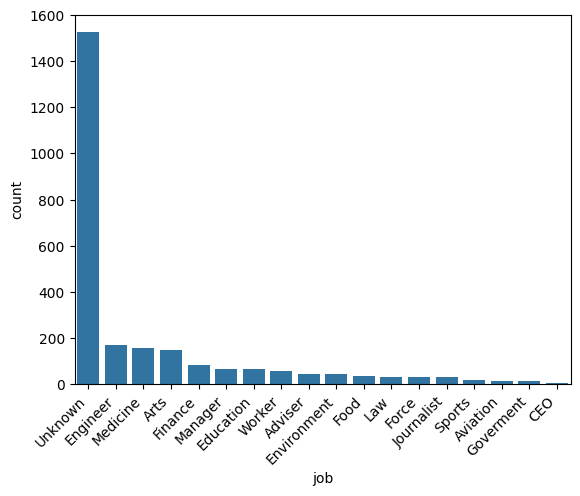

In [50]:
job_cat = user['job'].value_counts()
fig, ax = plt.subplots()
sns.barplot(job_cat, ax=ax)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
    label.set_rotation(45)
plt.show()

We have reduced the number of unique jobs and imputed `NaNs` values with `Unknown`, which is now the most frequent value.

Convert `birthdate` columns to datetime objects:

In [51]:
user['birthdate'] = pd.to_datetime(user['birthdate'], format='%Y-%m-%d')

Calculate `age` of each user. Then we impute `NaN`s values with mean age.

In [52]:
user['age'] = pd.to_datetime('today').year - user['birthdate'].dt.year

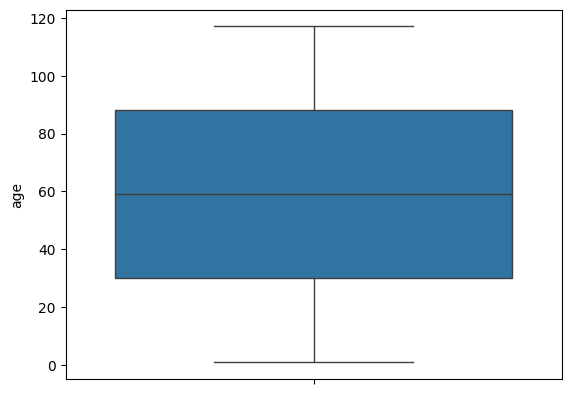

In [53]:
sns.boxplot(user['age'])
plt.show()

We can see from boxplot above that average age of user is about 60 years old. `birthdate` column has "strange" data, it says that average user has 60 years, so probably this data isn't correct.

In [54]:
user['age'] = user['age'].fillna(user['age'].mean())

We can drop column `birthdate` now.

In [55]:
user.drop('birthdate', axis=1, inplace=True)

We have two columns with address in dataset: `residence` and `address`. `residence` has about 65% missing values, `address` have 15%. We can try to combine these columns to get column with less missing values than we have.

In [56]:
residence = user[['residence', 'address']].bfill(axis=1).iloc[:, 0]
residence

0       Colônia Cunha\nSão Bernardo\n82378944 Ribeiro ...
1        508 Brian Passage Suite 633\nDianafurt, RI 48847
2                             Boční I 39\n575 30 Veltrusy
3       Via Cipriano, 1 Appartamento 8\n98137, Santo S...
4                              Bermanova 27\n762 59 Štětí
                              ...                        
2527             2757 Jeremy Island\nThomasview, VI 77944
2528    7658 Reed Motorway Apt. 388\nMorsehaven, NY 53913
2529                                                  NaN
2530                        U Hřiště 88\n655 39 Hostivice
2531                     PSC 6053, Box 5468\nAPO AA 44644
Name: residence, Length: 2532, dtype: object

In [57]:
print(f'Missing values: {residence.isnull().sum() / len(residence):.2f}')

Missing values: 0.11


So now we have only 11% missing values in out address column, we can now drop them

In [58]:
user.drop(['residence', 'address'], axis=1, inplace=True)
user['residence'] = residence
user['residence'].isnull().sum()

266

In [59]:
user.dropna(subset=['residence'], inplace=True)

### 2. Data Cleaning: `session`

In [60]:
print(f'Ratio of missing values in columns:\n')
session.isnull().sum() / len(session)

Ratio of missing values in columns:



pct_scroll_move_duration          0.000991
pct_mouse_move                    0.000991
mouse_move_total_rel_distance     0.000991
page_activity_duration            0.000991
pct_scrandom                      0.000991
screen_width                      0.000000
ack                               0.000000
pct_mouse_click                   0.000991
pct_input                         0.000991
pct_click                         0.001081
session_id                        0.000000
product_ean                       0.000000
browser_name                      0.000000
total_load_time                   0.000000
pct_scroll_move                   0.000991
user_id                           0.000000
scroll_move_total_rel_distance    0.000991
pct_click_product_info            0.000991
session_duration                  0.000000
pct_wild_mouse                    0.000991
screen_height                     0.000000
session_start                     0.000000
pct_rage_click                    0.000991
wild_mouse_

`pct_scroll_move_duration, pct_mouse_move, mouse_move_total_rel_distance, page_activity_duration, pct_scrandom, pct_mouse_click, pct_input, pct_scroll_move, scroll_move_total_rel_distance, pct_click_product_info, pct_wild_mouse, pct_rage_click, pct_doubleclick` - all have the same number of naNs, we can perform k-Nearest Neighbors (kNN) Imputation:

In [61]:
from sklearn.impute import KNNImputer

columns_to_impute = ['pct_scroll_move_duration', 'pct_mouse_move', 'mouse_move_total_rel_distance',
                     'page_activity_duration', 'pct_scrandom', 'pct_mouse_click', 'pct_input',
                     'pct_scroll_move', 'scroll_move_total_rel_distance', 'pct_click_product_info',
                     'pct_wild_mouse', 'pct_rage_click', 'pct_doubleclick']
data_to_impute = session[columns_to_impute]

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data_to_impute)
session[columns_to_impute] = imputed_data

In [62]:
columns_to_impute = ['wild_mouse_duration', 'pct_click']
session[columns_to_impute] = session[columns_to_impute].fillna(session[columns_to_impute].median())


Identify `outliers` and replace them with the cutoff values of the distribution:

In [63]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [64]:
columns_with_outliers = {}
numeric_attributes = session.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identify columns with outliers and count the number of outliers
for column in numeric_attributes:
    outliers = identify_outliers(session[column])
    if not outliers.empty:
        columns_with_outliers[column] = outliers
        num_outliers = outliers.shape[0]  # Count the number of outliers
        print(f"Column '{column}' has {num_outliers} outliers:")



Column 'pct_mouse_move' has 100 outliers:
Column 'mouse_move_total_rel_distance' has 82 outliers:
Column 'page_activity_duration' has 2 outliers:
Column 'pct_scrandom' has 85 outliers:
Column 'pct_mouse_click' has 84 outliers:
Column 'pct_input' has 1580 outliers:
Column 'pct_click' has 302 outliers:
Column 'total_load_time' has 354 outliers:
Column 'pct_scroll_move' has 82 outliers:
Column 'scroll_move_total_rel_distance' has 3 outliers:
Column 'pct_click_product_info' has 90 outliers:
Column 'session_duration' has 68 outliers:
Column 'pct_wild_mouse' has 74 outliers:
Column 'pct_rage_click' has 91 outliers:
Column 'wild_mouse_duration' has 170 outliers:
Column 'pct_doubleclick' has 114 outliers:


`page_activity_duration` and `scroll_move_total_rel_distance` dont have big amount of outliers we can just delete them

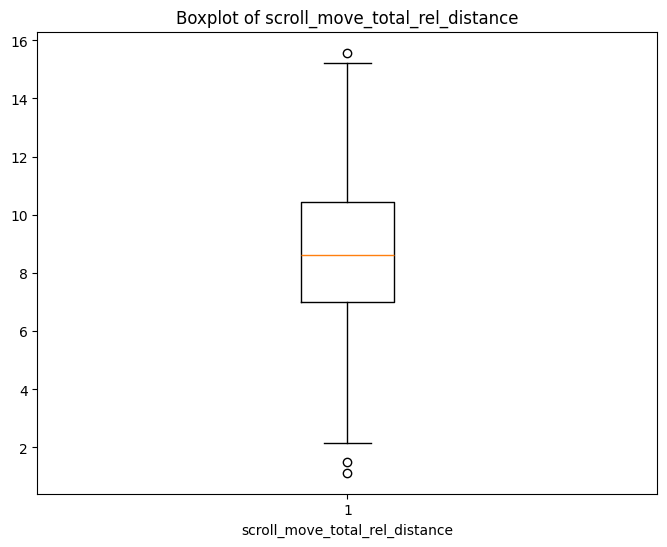

In [65]:
plt.figure(figsize=(8, 6))
plt.boxplot(session['scroll_move_total_rel_distance']) 
plt.title('Boxplot of scroll_move_total_rel_distance')
plt.xlabel('scroll_move_total_rel_distance')
plt.show()

In [66]:
outliers_page_duration = identify_outliers(session['page_activity_duration'])
outliers_scroll_distance = identify_outliers(session['scroll_move_total_rel_distance'])

# Remove rows containing outliers in the specified columns
session_no_outliers = session[~session.index.isin(outliers_page_duration.index) & ~session.index.isin(outliers_scroll_distance.index)]

replace the rest outliers with the cutoff values of the distribution:

In [67]:
for attribute in columns_with_outliers:
    # Example: Removing outliers by keeping values within 1.5*IQR range
    lower = session[attribute].quantile(0.25) - 1.5 * stats.iqr(session[attribute])
    upper = session[attribute].quantile(0.75) + 1.5 * stats.iqr(session[attribute])
    
    session[attribute] = session[attribute].clip(lower=lower, upper=upper)


## 2. Implementation of data preprocessing


`session` dataset and `product` dataset have common column `product_ean`.

In [68]:
len(list(set(session['product_ean']) & set(product['product_ean'])))

0

`session['product_ean']` and `product['product_ean']` have no common columns, so we probably won't be able to combine two datasets.

`session` dataset and `user` dataset have commmon column `user_id`.

In [69]:
len(list(set(session['user_id']) & set(user['user_id'])))

1465

`session['user_id']` and `product['user_id']` have 1567 common columns, so maybe we can combine these two datasets.

Because `session` dataset and `product` dataset has no common columns, we won't combine two datasets with each other and that's why we don'n need `product` dataset at all.

`registration` column have multiple formats of dates of registration:
* `%Y/%m/%d` (2021/06/09)
* `%d %b %Y` (28 Jun 2018)
* `%Y-%m-%d` (2022-06-13)
* `%m/%d/%Y, %h:%m:%s` (02/16/2022, 00:00:00)

So we need to standardize them to one format.

In [70]:
def transform_registration():
    col1 = pd.to_datetime(user['registration'], format='%Y/%m/%d', errors='coerce')
    col2 = pd.to_datetime(user['registration'], format='%d %b %Y', errors='coerce')
    col3 = pd.to_datetime(user['registration'], format='%Y-%m-%d', errors='coerce')
    col4 = pd.to_datetime(user['registration'], format='%m/%d/%Y, %H:%M:%S', errors='coerce')

    registration = pd.concat([col1, col2, col3, col4], axis=1)
    registration = registration.bfill(axis=1).iloc[:, 0]
    return registration

In [71]:
user['registration'] = transform_registration()

In [72]:
user = user.drop(['name', 'residence'], axis=1)

### 1. Combine datasets

In [73]:
user[user['user_id'] == 0]

,user_id,registration,sex,job,username,mail,age
1167,0,2017-04-11,Unknown,Unknown,oabe,ptakahashi@gmail.com,58.910983
1439,0,2015-10-08,Unknown,Worker,dreweselmar,orogner@hotmail.de,58.910983
1883,0,2016-12-15,F,Unknown,maaya51,atsushiyamamoto@yahoo.com,58.910983


We can see that multiple users in the `user` dataset have same `user_id`s.

Let's try to combine two datasets to one. The main dataset for prediction is `session`, so the `user` dataset will be an addition to the first one. That's why we can inner join two datasets.

In [74]:
combined = session.merge(user, how='left', on='user_id')
combined

,pct_scroll_move_duration,pct_mouse_move,mouse_move_total_rel_distance,page_activity_duration,pct_scrandom,screen_width,ack,pct_mouse_click,pct_input,pct_click,...,session_start,pct_rage_click,wild_mouse_duration,pct_doubleclick,registration,sex,job,username,mail,age
0,9.59904,7.68939,5.37487,8.36462,31.30541,800,0.0,9.13505,0.041250,9.68902,...,2021-07-25 06:48:47,50.79621,13.68951,12.36846,2017-04-09,Unknown,Medicine,hmontecchi,tgozzi@virgilio.it,104.000000
1,7.53387,8.62357,9.09357,10.26733,53.09397,0,1.0,8.63617,0.007560,12.24018,...,2019-01-11 02:58:46,49.31536,11.98616,7.30068,NaT,NaN,NaN,NaN,NaN,NaN
2,8.27570,9.14421,7.75349,11.57870,37.21614,0,1.0,8.69043,0.012190,10.83064,...,2020-11-29 07:57:48,36.50380,12.46916,7.71466,NaT,NaN,NaN,NaN,NaN,NaN
3,9.38995,9.19876,7.21016,6.81575,56.69968,1,0.0,9.37578,0.006160,11.86437,...,2019-08-25 20:50:57,55.56358,11.78585,12.05817,NaT,NaN,NaN,NaN,NaN,NaN
4,8.50961,9.03280,8.92165,7.77596,58.27990,1366,0.0,9.91178,0.000260,11.65294,...,2019-02-14 23:18:06,63.49090,8.42849,12.72820,2019-09-06,Unknown,Unknown,pietroalves,clarice71@yahoo.com.br,46.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14524,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2019-08-02,M,Unknown,claudiusgorlitz,lucianokabus@gmx.de,109.000000
14525,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2021-10-16,Unknown,Unknown,novotnymiroslav,krizmiloslav@chello.cz,58.910983
14526,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2020-06-21,Unknown,Unknown,walterreese,martinezisaac@yahoo.com,58.910983
14527,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2020-05-28,Unknown,Unknown,cynthia72,karenmiranda@yahoo.com,58.910983


In [75]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14529 entries, 0 to 14528
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   pct_scroll_move_duration        14529 non-null  float64       
 1   pct_mouse_move                  14529 non-null  float64       
 2   mouse_move_total_rel_distance   14529 non-null  float64       
 3   page_activity_duration          14529 non-null  float64       
 4   pct_scrandom                    14529 non-null  float64       
 5   screen_width                    14529 non-null  int64         
 6   ack                             14529 non-null  float64       
 7   pct_mouse_click                 14529 non-null  float64       
 8   pct_input                       14529 non-null  float64       
 9   pct_click                       14529 non-null  float64       
 10  session_id                      14529 non-null  int64         
 11  pr

We can see now how looks our final dataset. Because we combined two datasets, we can see that we have more rows than there were in initial `session` dataset (15037 entries). If we drop all rows that were created after merge method, we will get the initial number of rows. So let's drop them.

In [76]:
combined = combined.dropna()

In [77]:
combined

,pct_scroll_move_duration,pct_mouse_move,mouse_move_total_rel_distance,page_activity_duration,pct_scrandom,screen_width,ack,pct_mouse_click,pct_input,pct_click,...,session_start,pct_rage_click,wild_mouse_duration,pct_doubleclick,registration,sex,job,username,mail,age
0,9.59904,7.68939,5.37487,8.36462,31.30541,800,0.0,9.13505,0.041250,9.68902,...,2021-07-25 06:48:47,50.79621,13.68951,12.36846,2017-04-09,Unknown,Medicine,hmontecchi,tgozzi@virgilio.it,104.000000
4,8.50961,9.03280,8.92165,7.77596,58.27990,1366,0.0,9.91178,0.000260,11.65294,...,2019-02-14 23:18:06,63.49090,8.42849,12.72820,2019-09-06,Unknown,Unknown,pietroalves,clarice71@yahoo.com.br,46.000000
5,10.21832,9.43535,6.90738,8.87715,61.59385,800,0.0,8.42163,0.007060,9.36515,...,2020-01-25 09:21:16,51.62031,11.92129,10.68348,2015-05-16,Unknown,Unknown,siegrunetzold,schaeferjohanne@googlemail.com,58.910983
6,10.21832,9.43535,6.90738,8.87715,61.59385,800,0.0,8.42163,0.007060,9.36515,...,2020-01-25 09:21:16,51.62031,11.92129,10.68348,2014-03-02,F,Unknown,bergerkasimir,gklingelhoefer@aol.de,81.000000
7,10.21832,9.43535,6.90738,8.87715,61.59385,800,0.0,8.42163,0.007060,9.36515,...,2020-01-25 09:21:16,51.62031,11.92129,10.68348,2015-12-26,F,Unknown,karagao,acaldeira@gmail.com,104.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14524,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2019-08-02,M,Unknown,claudiusgorlitz,lucianokabus@gmx.de,109.000000
14525,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2021-10-16,Unknown,Unknown,novotnymiroslav,krizmiloslav@chello.cz,58.910983
14526,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2020-06-21,Unknown,Unknown,walterreese,martinezisaac@yahoo.com,58.910983
14527,6.65437,7.90783,7.16540,9.87087,66.21809,1280,1.0,9.22723,0.005530,11.18617,...,2023-09-08 00:16:20,63.69988,11.67047,7.39957,2020-05-28,Unknown,Unknown,cynthia72,karenmiranda@yahoo.com,58.910983


In [78]:
len(combined['username'].unique())

2187

In [79]:
len(combined['mail'].unique())

2198

We have about 2.5K unique usernames and mails, these two columns have high cardinality and probably won't provide us with further information for machine learning algorithm. So let's drop them.

In [80]:
combined = combined.drop(['username', 'mail'], axis=1)

Divide dataset to features and target variables:

In [81]:
X, y = combined.drop(['ack'], axis=1), combined['ack']

In [82]:
X.shape, y.shape

((10066, 28), (10066,))

Split the data for train_val and test datasets:

In [83]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=42)

In [84]:
X_train_val.shape, y_train_val.shape

((7549, 28), (7549,))

Now, for machine learning algorithm we should encode categorical data in out dataset. The categorical columns are `sex`, `job`, `browser_name`.

Now, for machine learning algorithm we should encode categorical data in out dataset. The categorical columns are `sex`, `job`, `browser_name`.

In [85]:
X_train_val_num = X_train_val.drop(['sex', 'job', 'browser_name'], axis=1)
X_train_val_cat = X_train_val[['sex', 'job', 'browser_name']]

For numerical columns, let's standardize them, because they have some sort of Gaussian distribution, so it will probably be the best scaling algorithm.

Also, for the numerical columns we will not standardize columns: `screen_width`, `session_id`, `product_ean`, `user_id`, `screen_height`, `session_start`, `registration`, `age`.

In [86]:
X_train_val_num_norm = X_train_val_num.drop(['screen_width', 'session_id', 'product_ean', 'user_id',
                                             'screen_height', 'session_start', 'registration', 'age'], axis=1)
X_train_val_num_keep = X_train_val_num[['screen_width', 'session_id', 'product_ean', 'user_id',
                                        'screen_height', 'session_start', 'registration', 'age']]

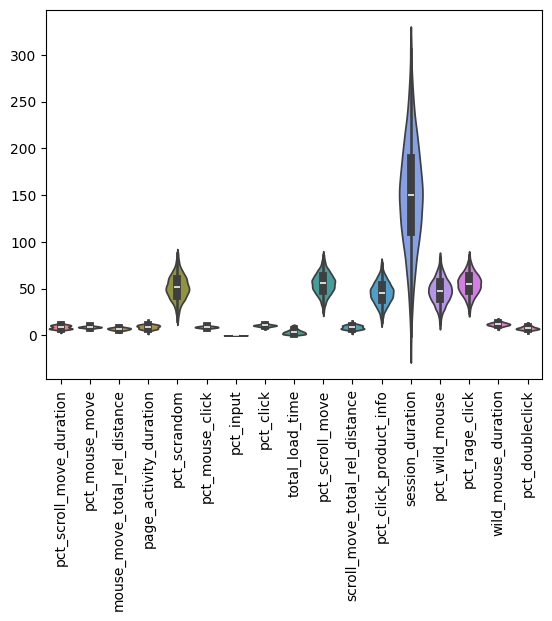

In [87]:
fig, ax = plt.subplots()
sns.violinplot(X_train_val_num_norm)
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

First, let's remove outliers from the data:

In [88]:
def detect_outliers(col, min_perc, max_perc):
    q_min = np.quantile(col, min_perc)
    q_max = np.quantile(col, max_perc)
    iqr = 1.5 * (q_max - q_min)

    lower = q_min - iqr
    upper = q_max + iqr
    return col[(col < lower) | (col > upper)]

We have one column with big number of outliers - `pct_input`. So we will remove these outliers from it

In [89]:
indices_to_drop = detect_outliers(X_train_val_num_norm['pct_input'], 0.1, 0.8).index
X_train_val_num_norm = X_train_val_num_norm.drop(indices_to_drop)
X_train_val_num_keep = X_train_val_num_keep.drop(indices_to_drop)
X_train_val_cat = X_train_val_cat.drop(indices_to_drop)
y_train_val = y_train_val.drop(indices_to_drop)

In [90]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train_val_num_norm)
X_train_val_num_scaled = standard_scaler.transform(X_train_val_num_norm)

Now, let's encode categorical variables:

In [91]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
X_train_val_cat_encoded = one_hot_encoder.fit_transform(X_train_val_cat)
X_train_val_cat_encoded[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0

In [92]:
one_hot_encoder.categories_

[array(['F', 'M', 'Unknown'], dtype=object),
 array(['Adviser', 'Arts', 'Aviation', 'CEO', 'Education', 'Engineer',
        'Environment', 'Finance', 'Food', 'Force', 'Goverment',
        'Journalist', 'Law', 'Manager', 'Medicine', 'Sports', 'Unknown',
        'Worker'], dtype=object),
 array(['chrome', 'edge', 'firefox', 'mobile', 'opera', 'other', 'safari'],
       dtype=object)]

In [93]:
X_train_val_num_keep['session_start_year'] = X_train_val_num_keep['session_start'].dt.year
X_train_val_num_keep['session_start_month'] = X_train_val_num_keep['session_start'].dt.month
X_train_val_num_keep['session_start_day'] = X_train_val_num_keep['session_start'].dt.day
X_train_val_num_keep['session_start_hour'] = X_train_val_num_keep['session_start'].dt.hour
X_train_val_num_keep['session_start_minute'] = X_train_val_num_keep['session_start'].dt.minute
X_train_val_num_keep['session_start_second'] = X_train_val_num_keep['session_start'].dt.second

X_train_val_num_keep['registration_year'] = X_train_val_num_keep['registration'].dt.year
X_train_val_num_keep['registration_month'] = X_train_val_num_keep['registration'].dt.month
X_train_val_num_keep['registration_day'] = X_train_val_num_keep['registration'].dt.day

X_train_val_num_keep = X_train_val_num_keep.drop(['session_start', 'registration'], axis=1)

Let's combine all three preprocessed datasets to one for machine learning model:

In [94]:
df_array = np.concatenate([X_train_val_cat_encoded, X_train_val_num_scaled, X_train_val_num_keep.to_numpy()], axis=1)
df_array

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.023e+03, 2.000e+00,
        2.400e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.020e+03, 9.000e+00,
        2.100e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.023e+03, 5.000e+00,
        2.700e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.014e+03, 1.100e+01,
        2.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.021e+03, 1.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.016e+03, 6.000e+00,
        1.900e+01]])

In [95]:
df_array.shape, y_train_val.shape

((7549, 60), (7549,))

In [96]:
df_array

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 2.023e+03, 2.000e+00,
        2.400e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.020e+03, 9.000e+00,
        2.100e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.023e+03, 5.000e+00,
        2.700e+01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.014e+03, 1.100e+01,
        2.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.021e+03, 1.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.016e+03, 6.000e+00,
        1.900e+01]])

## 3. Selection of attributes for machine learning

There are no much correlated variables in this dataset. Columns which are correlated with column `ack` are: `wild_mouse_duration`, `pct_input `, `scroll_move_total_rel_distance`, `page_activity_duration`, `pct_doubleclick`

In [98]:
numeric_columns = combined.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix_combined = combined[numeric_columns].corr()['ack'].sort_values(ascending=False)
correlation_matrix_combined

ack                               1.000000
page_activity_duration            0.708365
total_load_time                   0.031642
pct_wild_mouse                    0.019195
pct_mouse_move                    0.015681
pct_scroll_move_duration          0.013085
product_ean                       0.009612
screen_height                     0.008864
pct_scroll_move                   0.004894
screen_width                      0.002891
pct_click_product_info            0.002755
pct_scrandom                     -0.001180
mouse_move_total_rel_distance    -0.001913
age                              -0.002975
pct_rage_click                   -0.003368
pct_click                        -0.005273
session_duration                 -0.015073
user_id                          -0.019224
session_id                       -0.020783
pct_mouse_click                  -0.021305
wild_mouse_duration              -0.377663
pct_doubleclick                  -0.387256
pct_input                        -0.453053
scroll_move

To find out if there are correlations based on gender, lets drop 'Unknown' rows

In [99]:
combined_dupl = combined.copy() 
combined_dupl = combined_dupl[combined_dupl['sex'] != 'Unknown']
# Convert 'sex' column to numerical (0 and 1)
combined_dupl['sex_numeric'] = combined_dupl['sex'].replace({'M': 0, 'F': 1})

# Calculate point biserial correlation
point_biserial_corr = combined_dupl['sex_numeric'].corr(combined_dupl['ack'])

print(f" Correlation between 'sex' and 'ack': {point_biserial_corr}")

purchase_counts_by_gender = combined_dupl[combined['ack'] == 1]['sex'].value_counts()

print("Purchase Counts by Gender:")
print(purchase_counts_by_gender)

 Correlation between 'sex' and 'ack': 0.00404410430093745
Purchase Counts by Gender:
sex
M    1356
F    1349
Name: count, dtype: int64


/tmp/ipykernel_27543/4022965964.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_dupl['sex_numeric'] = combined_dupl['sex'].replace({'M': 0, 'F': 1})
/tmp/ipykernel_27543/4022965964.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purchase_counts_by_gender = combined_dupl[combined['ack'] == 1]['sex'].value_counts()


We can see that there are no correlation between ack and sex attributes

In [100]:
job_dummies = pd.get_dummies(combined['job'])

# Concatenate the dummy variables with the 'ack' column
data_with_dummies = pd.concat([combined['ack'], job_dummies], axis=1)

# Calculate correlations between 'ack' and job types
correlations = data_with_dummies.corr()['ack'].drop('ack')  # Drop self-correlation with 'ack'

# Filter correlations for specific job types
selected_job_types = ['Adviser', 'Arts', 'Aviation', 'CEO', 'Education', 'Engineer',
                      'Environment', 'Finance', 'Food', 'Force', 'Goverment',
                      'Journalist', 'Law', 'Manager', 'Medicine', 'Sports', 'Unknown',
                      'Worker']

correlations_selected_jobs = correlations[selected_job_types]

print("Correlation with 'ack' for selected job types:")
print(correlations_selected_jobs)

Correlation with 'ack' for selected job types:
Adviser       -0.017503
Arts           0.006550
Aviation      -0.000808
CEO            0.014127
Education      0.004069
Engineer      -0.000504
Environment    0.009020
Finance        0.008911
Food          -0.005827
Force         -0.003217
Goverment      0.016093
Journalist     0.007161
Law           -0.006432
Manager       -0.008278
Medicine      -0.007774
Sports        -0.021442
Unknown        0.009047
Worker        -0.018721
Name: ack, dtype: float64


Professions with the most ack=1: CEO(77.7%), Goverment(65.9%), with the least: Sports(41.6%), Adviser(47.7%), Worker(47.8%)

In [101]:
combined_dupl = combined.copy()
combined_dupl['registration_year'] = pd.to_datetime(combined['registration']).dt.year

correlation_registration_ack = combined_dupl['registration_year'].corr(combined_dupl['ack'])

print(f"Correlation between 'registration' and 'ack': {correlation_registration_ack}")

Correlation between 'registration' and 'ack': -0.008995544927066931


registration and ack also dont have high correlation

Importancy of different attributes:

Important: `wild_mouse_duration`, `pct_input `, `scroll_move_total_rel_distance`, `page_activity_duration`,`pct_doubleclick`, `job`

Medium importance: `total_load_time`, `pct_mouse_click`, `session_id`, `user_id`, `pct_wild_mouse`, `pct_mouse_move`, `session_duration`,`pct_scroll_move_duration`

Unimportant: everything else

Let's use `SelectKBest` to choose features for our future model

In [102]:
from sklearn.feature_selection import SelectKBest
best_features = SelectKBest()
best_features.fit(df_array, y_train_val)

SelectKBest()

In [103]:
feature_names = ['F', 'M', 'Unknown', 'Adviser', 'Arts', 'Aviation', 'CEO', 'Education',
                 'Engineer', 'Environment', 'Finance', 'Food', 'Force', 'Goverment',
                 'Journalist', 'Law', 'Manager', 'Medicine', 'Sports', 'Unknown', 'Worker',
                 'chrome', 'edge', 'firefox', 'mobile', 'opera', 'other', 'safari',
                 'pct_scroll_move_duration', 'pct_mouse_move', 'mouse_move_total_rel_distance',
                 'page_activity_duration', 'pct_scrandom', 'pct_mouse_click', 'pct_input',
                 'pct_click', 'total_load_time', 'pct_scroll_move', 'scroll_move_total_rel_distance',
                 'pct_click_product_info', 'session_duration', 'pct_wild_mouse', 'pct_rage_click',
                 'wild_mouse_duration', 'pct_doubleclick', 'screen_width', 'session_id',
                 'product_ean', 'user_id', 'screen_height', 'age', 'session_start_year', 
                 'session_start_month', 'session_start_day', 'session_start_hour',
                 'session_start_minute', 'session_start_second', 'registration_year',
                 'registration_month', 'registration_day']

In [104]:
best_features.scores_

array([5.09380191e-02, 2.03173138e+00, 1.09054575e+00, 1.61878874e+00,
       3.65972365e-01, 7.22551312e-01, 1.34356573e+00, 5.80519386e-01,
       1.21092617e-01, 4.03864733e-01, 5.38060164e-01, 6.02477386e-03,
       2.53529648e-01, 5.29237255e+00, 2.57753717e-03, 9.20693452e-01,
       7.57715551e-02, 1.33733477e-02, 1.05624994e+00, 5.53987913e-05,
       2.68629094e+00, 5.30583072e+00, 2.89062512e+00, 5.35646755e-05,
       1.60612575e-01, 2.31871288e+00, 9.12676425e+00, 2.57796824e-02,
       2.51921939e+00, 1.42250351e+00, 7.88436589e-03, 7.87744364e+03,
       8.61807067e-02, 4.28435192e+00, 2.02160836e+03, 5.12852634e-01,
       5.95473122e+00, 3.60017591e-01, 7.99652876e+03, 3.53662025e-02,
       2.14043259e+00, 4.77278786e+00, 1.99648407e-03, 1.32512633e+03,
       1.36020457e+03, 3.38105923e-01, 2.33194495e+00, 3.63666069e-01,
       1.67277929e+00, 4.03231896e-01, 7.75864332e-03, 4.66288115e-01,
       5.55180852e+00, 5.16361978e-02, 1.92420172e+00, 7.40307157e+00,
      

In [105]:
features_dict = {}
for name, feature in zip(feature_names, best_features.scores_):
    features_dict[name] = feature

In [106]:
features_dict_sorted = sorted(features_dict.items(), key=lambda item: -item[1])
features_dict_sorted

[('scroll_move_total_rel_distance', 7996.528755302097),
 ('page_activity_duration', 7877.443639236358),
 ('pct_input', 2021.6083606947705),
 ('pct_doubleclick', 1360.2045653852117),
 ('wild_mouse_duration', 1325.1263338126196),
 ('other', 9.126764250992315),
 ('session_start_minute', 7.40307157146622),
 ('total_load_time', 5.954731223765963),
 ('session_start_month', 5.551808515480961),
 ('chrome', 5.3058307217090155),
 ('Goverment', 5.292372552005498),
 ('pct_wild_mouse', 4.772787857006798),
 ('pct_mouse_click', 4.284351921946848),
 ('session_start_second', 4.283454917834423),
 ('edge', 2.8906251222689634),
 ('Worker', 2.6862909396932384),
 ('pct_scroll_move_duration', 2.519219388616707),
 ('session_id', 2.3319449506490653),
 ('opera', 2.318712880653246),
 ('session_duration', 2.140432586012807),
 ('M', 2.0317313788701217),
 ('session_start_hour', 1.9242017154645155),
 ('user_id', 1.6727792861008401),
 ('Adviser', 1.6187887444383793),
 ('pct_mouse_move', 1.4225035136910742),
 ('CEO', 

Now, we can see which features best fit to our feature machine learning model. We can see that `page_activity_duration` is the most "valuable" feature in our dataset.

## 4. Replicability of preprocessing

In [107]:
import numpy as np
import pandas as pd

Let's create pipeline for data cleaning steps which we did earlier.

To make the job easier, let's load the dataset again, and do the pipeline for initial datasets.

In [108]:
user_df = pd.read_csv('data/user.csv', delimiter='\t')
session_df = pd.read_csv('data/session.csv', delimiter='\t')

### 1. User

In [109]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [110]:
class columnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

    def fit(self, X, y=None):
        return self 

In [111]:
class jobsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, job_column):
        self.job_column = job_column

    def transform(self, X, y=None):
        X[self.job_column] = X[self.job_column].map(jobs_dict)
        return X

    def fit(self, X, y=None):
        return self

In [112]:
class dateUserColumnsTransformer(BaseEstimator, TransformerMixin):
    def transform(self, X, y=None):
        X['birthdate'] = pd.to_datetime(X['birthdate'], format='%Y-%m-%d')
        X['age'] = pd.to_datetime('today').year - X['birthdate'].dt.year

        X['registration'] = self._transform_registration()
        X['reg_year'] =  X['registration'].dt.year
        X['reg_month'] = X['registration'].dt.month
        X['reg_day'] =   X['registration'].dt.day
        return X

    def fit(self, X, y=None):
        return self

    def _transform_registration(self):
        col1 = pd.to_datetime(user['registration'], format='%Y/%m/%d',           errors='coerce')
        col2 = pd.to_datetime(user['registration'], format='%d %b %Y',           errors='coerce')
        col3 = pd.to_datetime(user['registration'], format='%Y-%m-%d',           errors='coerce')
        col4 = pd.to_datetime(user['registration'], format='%m/%d/%Y, %H:%M:%S', errors='coerce')

        registration = pd.concat([col1, col2, col3, col4], axis=1)
        registration = registration.bfill(axis=1).iloc[:, 0]
        return registration

In [113]:
user_pipeline = Pipeline([
    ('jobs_pipeline', jobsTransformer('job')),
    ('dates_pipeline', dateUserColumnsTransformer()),
    ('drop_pipeline', columnDropperTransformer(['race', 'registration',
                                                'name', 'username',
                                                'birthdate', 'mail',
                                                'residence', 'address'])),
])

In [114]:
user_df = user_pipeline.fit_transform(user_df)

### 2. Session

In [115]:
class screenTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X, y=None):
        for c in self.columns:
            X[c] = X[c].replace(map_screen)
            X[c] = X[c].astype(int)
        return X

    def fit(self, X, y=None):
        return self

In [116]:
class dateSessionColumnsTransformer(BaseEstimator, TransformerMixin):
    def transform(self, X, y=None):
        X['session_start'] = pd.to_datetime(X['session_start'])
        
        X['ss_year'] =   X['session_start'].dt.year
        X['ss_month'] =  X['session_start'].dt.month
        X['ss_day'] =    X['session_start'].dt.day
        X['ss_hour'] =   X['session_start'].dt.hour
        X['ss_minute'] = X['session_start'].dt.minute
        X['ss_second'] = X['session_start'].dt.second
        return X
        
    def fit(self, X, y=None):
        return self

In [117]:
session_pipeline = Pipeline([
    ('screen_pipeline', screenTransformer(['screen_width', 'screen_height'])),
    ('dates_pipeline', dateSessionColumnsTransformer()),
    ('drop_pipeline', columnDropperTransformer(['session_start'])),
])

In [118]:
session_df = session_pipeline.fit_transform(session_df)

Now, we have two pipelines for initial data cleaning for two datasets that will be used in machine learning model

Combined datasets after pipelines:

In [119]:
combined_df = user_df.merge(session_df, how='left', on='user_id')

Divide by `X`, `y`, and after to `train_val` and `test`:

In [120]:
X = combined_df.drop('ack', axis=1)
y = combined_df['ack']

In [121]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=42)

Combined pipeline:

In [122]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    
    def fit(self, X, y=None):
        X = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        if self.dtype == 'numerical':
            self.cols = X.select_dtypes(exclude='O').columns.tolist()
        elif self.dtype == 'categorical':
            self.cols = X.select_dtypes(include='O').columns.tolist()
        self.col_idx = [X.columns.get_loc(col) for col in self.cols]
        return self

    def transform(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        return X[:, self.col_idx]

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion


combined_num_pipeline = Pipeline([
    ('num_selector', ColumnSelector('numerical')),
    ('num_imputer', SimpleImputer(strategy='median'))
])

combined_cat_pipeline = Pipeline([
    ('cat_selector', ColumnSelector('categorical')),
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('cat_encoder', OneHotEncoder()),
])

combined_pipeline = FeatureUnion([
    ('num_pipe', combined_num_pipeline),
    ('cat_pipe', combined_cat_pipeline)
])

In [124]:
combined_pipeline.fit_transform(X_train_val)

<8488x61 sparse matrix of type '<class 'numpy.float64'>'
	with 294810 stored elements in Compressed Sparse Row format>